In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Análisis exploratorio de los datos

In [3]:
data = pd.read_csv("Data_CustomerLifeTimeValue.csv")

In [4]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/01/2009 07:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/01/2009 07:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/01/2009 07:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/01/2009 07:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/01/2009 07:45,1.25,13085.0,United Kingdom


In [5]:
# ¿Cuántas observaciones y variables tienen el dataset?
observaciones, variables = data.shape
print("El conjunto de datos tiene", observaciones, "observaciones y", variables, "variables.")

El conjunto de datos tiene 1044847 observaciones y 8 variables.


In [6]:
# ¿Qué tipo de variables son?
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044847 entries, 0 to 1044846
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1044847 non-null  object 
 1   StockCode    1044847 non-null  object 
 2   Description  1040572 non-null  object 
 3   Quantity     1044847 non-null  int64  
 4   InvoiceDate  1044847 non-null  object 
 5   Price        1044847 non-null  float64
 6   Customer ID  809560 non-null   float64
 7   Country      1044847 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 63.8+ MB


In [7]:
# ¿Qué variables contienen valores nulos?
print(data.isnull().sum())

Invoice             0
StockCode           0
Description      4275
Quantity            0
InvoiceDate         0
Price               0
Customer ID    235287
Country             0
dtype: int64


In [8]:
# Eliminación de registros con descripción nula y cuando no haya registro de cliente
data.dropna(subset=['Description', 'Customer ID'], inplace=True)

In [9]:
# ¿Cuántas observaciones y variables tienen el dataset?
observaciones, variables = data.shape
print("El conjunto de datos tiene", observaciones, "observaciones y", variables, "variables.")

El conjunto de datos tiene 809560 observaciones y 8 variables.


In [10]:
# Convertir 'InvoiceDate' a formato datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Crear columna 'InvoiceYearMonth'
data['InvoiceYearMonth'] = data['InvoiceDate'].apply(lambda x: x.strftime('%Y-%m')) 

In [11]:
# Crear columna 'Revenue'
data['Revenue'] = data['Quantity'] * data['Price']

In [12]:
# Agrupar por 'InvoiceYearMonth' y calcular la suma de 'Revenue'
monthly_revenue = data.groupby('InvoiceYearMonth')['Revenue'].sum()

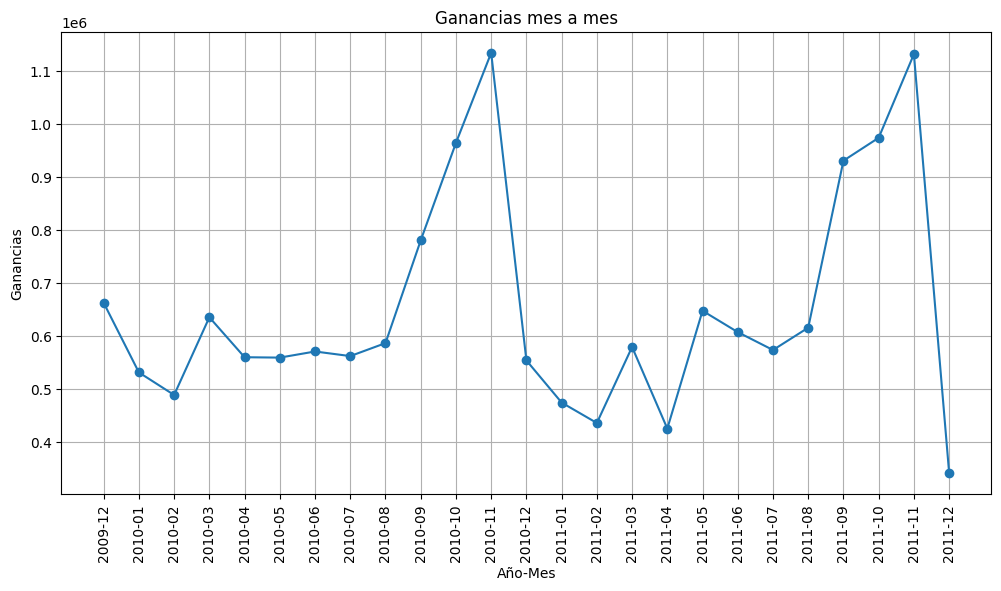

In [13]:
# Crear el gráfico de líneas
plt.figure(figsize=(12,6))
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o')
plt.title('Ganancias mes a mes')
plt.xlabel('Año-Mes')
plt.ylabel('Ganancias')
plt.xticks(rotation='vertical')
plt.grid()
plt.show()

In [14]:
# Tasa de crecimiento de los ingresos mensuales
monthly_revenue_growth = monthly_revenue.pct_change()

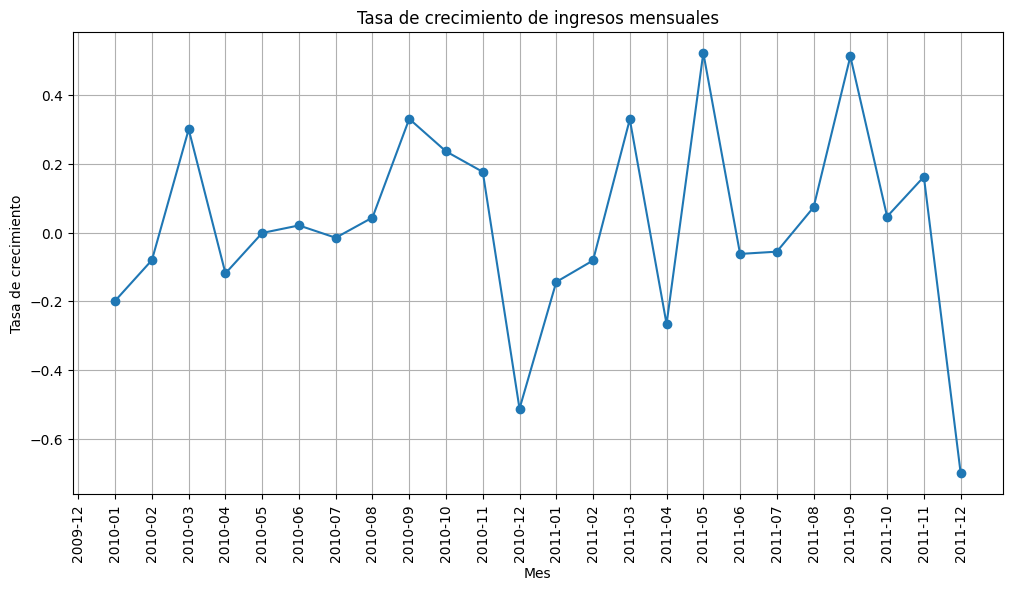

In [15]:
# Gráfico de líneas para la tasa de crecimiento
plt.figure(figsize=(12,6))
plt.plot(monthly_revenue_growth.index, monthly_revenue_growth.values, marker='o')
plt.title('Tasa de crecimiento de ingresos mensuales')
plt.xlabel('Mes')
plt.ylabel('Tasa de crecimiento')
plt.xticks(rotation='vertical')
plt.grid()
plt.show()

In [16]:
# Tasa de crecimiento del último mes completo
last_month_growth_rate = monthly_revenue_growth[-2]
print("La tasa de crecimiento del último mes completo es {:.2f}%".format(last_month_growth_rate * 100))

La tasa de crecimiento del último mes completo es 16.19%


In [17]:
# Número de clientes únicos por mes
monthly_active_customers = data.groupby('InvoiceYearMonth')['Customer ID'].nunique()

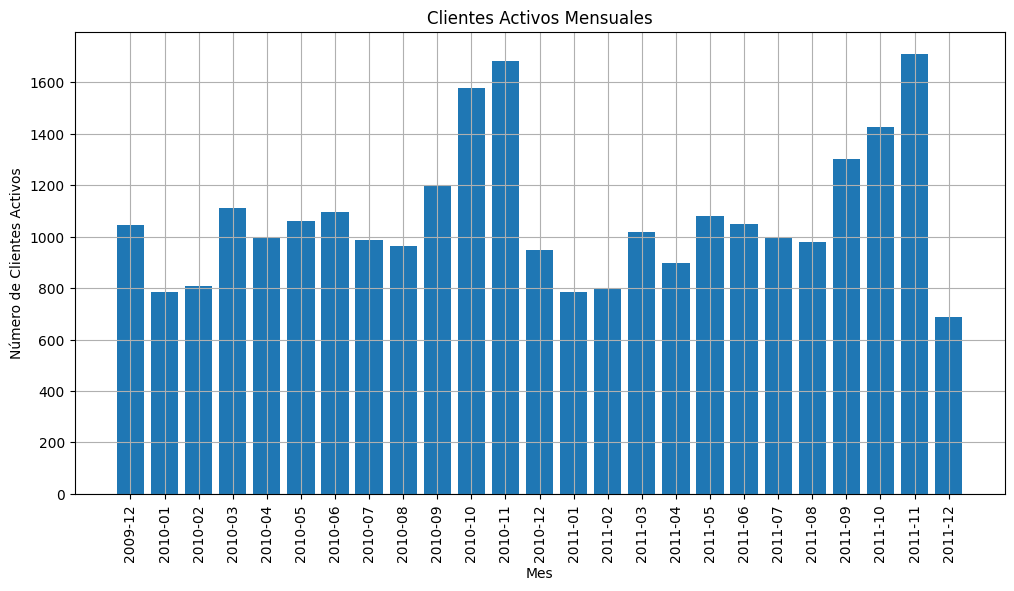

In [18]:
plt.figure(figsize=(12,6))
plt.bar(monthly_active_customers.index, monthly_active_customers.values)
plt.title('Clientes Activos Mensuales')
plt.xlabel('Mes')
plt.ylabel('Número de Clientes Activos')
plt.xticks(rotation='vertical')
plt.grid()
plt.show()

In [19]:
# Copia del DataFrame original
data_copy = data.copy()

In [20]:
# Añadir las columnas 'Year', 'Month', 'Day', 'Quarter', 'DayOfWeek' y 'Time'
data_copy['Year'] = data_copy['InvoiceDate'].dt.year
data_copy['Month'] = data_copy['InvoiceDate'].dt.month
data_copy['Day'] = data_copy['InvoiceDate'].dt.day
data_copy['Quarter'] = data_copy['InvoiceDate'].dt.quarter
data_copy['DayOfWeek'] = data_copy['InvoiceDate'].dt.dayofweek  # 0 is Monday, 6 is Sunday
data_copy['Time'] = data_copy['InvoiceDate'].dt.time

In [21]:
# Productos más vendidos
top_products = data_copy.groupby('Description')['Quantity'].sum().sort_values(ascending=False)
print("Top 5 productos más vendidos:")
print(top_products.head())

Top 5 productos más vendidos:
Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     103745
WHITE HANGING HEART T-LIGHT HOLDER     88246
ASSORTED COLOUR BIRD ORNAMENT          77966
JUMBO BAG RED RETROSPOT                73195
BROCADE RING PURSE                     69379
Name: Quantity, dtype: int64


In [22]:
# ¿En qué mes, año, trimestre, semana y día se produjeron la mayoría de las transacciones?
print("Las mayores transacciones se produjeron en:")
print('Año:', data_copy['Year'].value_counts()[:1].index[0])
print('Mes:', data_copy['Month'].value_counts()[:1].index[0])
print('Día:', data_copy['Day'].value_counts()[:1].index[0])
print('Trimestre:', data_copy['Quarter'].value_counts()[:1].index[0])
print('Día de la semana:', data_copy['DayOfWeek'].value_counts()[:1].index[0])

Las mayores transacciones se produjeron en:
Año: 2010
Mes: 11
Día: 7
Trimestre: 4
Día de la semana: 3


In [23]:
# Número de transacciones y el precio medio para cada país
country_data = data.groupby('Country').agg({'Invoice': 'count', 'Price': 'mean'}).reset_index()

# Renombrar las columnas
country_data.columns = ['Country', 'Number_of_Transactions', 'Average_Price']

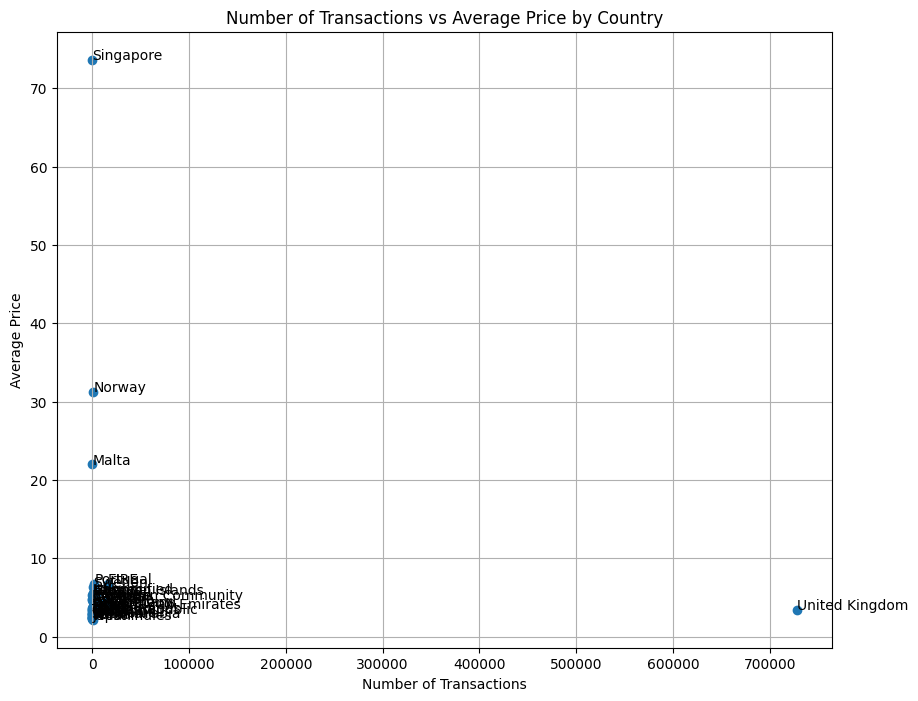

In [24]:
plt.figure(figsize=(10,8))

# Tráfico de puntos
plt.scatter(country_data['Number_of_Transactions'], country_data['Average_Price'])

# Etiquetas a los puntos para identificar los países
for i, country in enumerate(country_data['Country']):
    plt.annotate(country, (country_data['Number_of_Transactions'].iat[i], country_data['Average_Price'].iat[i]))

plt.xlabel('Number of Transactions')
plt.ylabel('Average Price')
plt.title('Number of Transactions vs Average Price by Country')
plt.grid()
plt.show()

In [25]:
data['Country'].value_counts()

United Kingdom          727663
Germany                  17363
EIRE                     16029
France                   13930
Netherlands               5138
Spain                     3766
Belgium                   3111
Switzerland               3058
Portugal                  2424
Australia                 1891
Channel Islands           1647
Italy                     1509
Sweden                    1345
Norway                    1308
Cyprus                    1176
Finland                   1049
Austria                    938
Denmark                    797
Greece                     663
Japan                      565
USA                        535
Poland                     527
Unspecified                524
United Arab Emirates       386
Singapore                  346
Israel                     324
Malta                      299
Canada                     228
Iceland                    222
Lithuania                  154
RSA                        123
Brazil                      94
Thailand

In [26]:
country_data

,Country,Number_of_Transactions,Average_Price
0,Australia,1891,4.238689
1,Austria,938,4.460896
2,Bahrain,59,2.890000
3,Belgium,3111,4.734642
4,Brazil,94,2.726702
5,Canada,228,4.640746
6,Channel Islands,1647,5.401433
7,Cyprus,1176,5.386012
8,Czech Republic,30,2.938333
9,Denmark,797,2.891995



Guardamos los registros generados por el país que contiene más pedidos en un dataset nuevo para trabajar con él.


In [27]:
# registros del país con más pedidos
uk_data = data[data['Country'] == 'United Kingdom']

In [28]:
# Agrupamos por meses
uk_monthly_orders = uk_data.groupby('InvoiceYearMonth')['Invoice'].nunique()

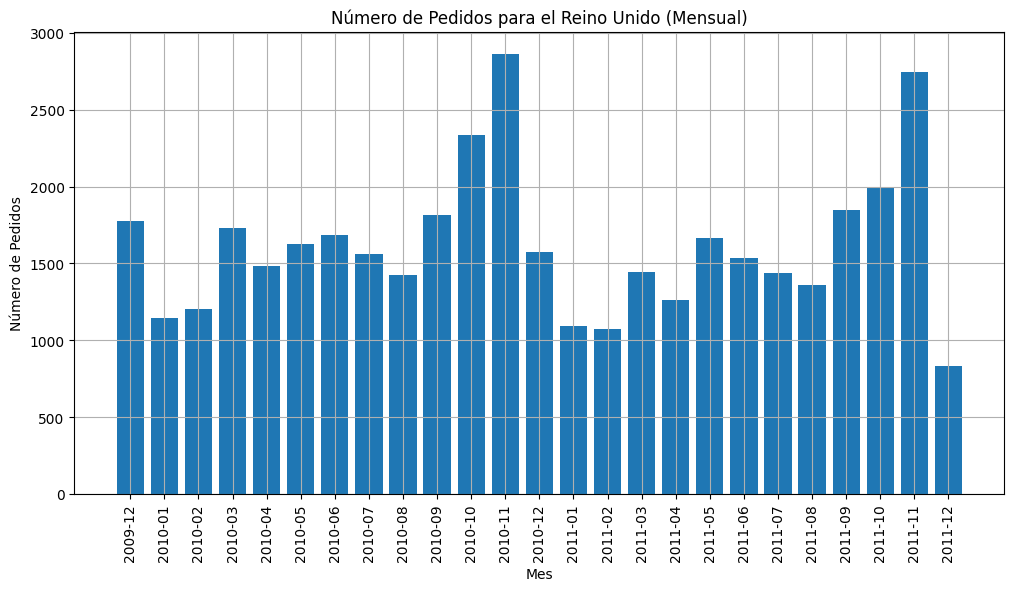

In [29]:
plt.figure(figsize=(12,6))
plt.bar(uk_monthly_orders.index, uk_monthly_orders.values)
plt.title('Número de Pedidos para el Reino Unido (Mensual)')
plt.xlabel('Mes')
plt.ylabel('Número de Pedidos')
plt.xticks(rotation='vertical')
plt.grid()
plt.show()

In [30]:
uk_monthly_revenue = uk_data.groupby(['InvoiceYearMonth'])['Revenue'].sum() / uk_data.groupby(['InvoiceYearMonth'])['Invoice'].nunique()

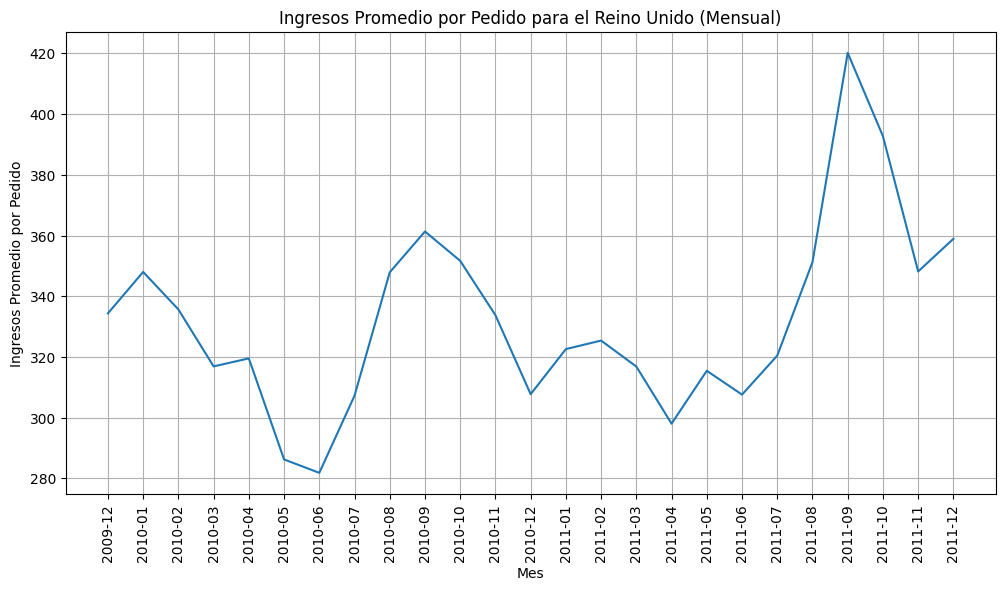

In [31]:
plt.figure(figsize=(12,6))
plt.plot(uk_monthly_revenue.index, uk_monthly_revenue.values)
plt.title('Ingresos Promedio por Pedido para el Reino Unido (Mensual)')
plt.xlabel('Mes')
plt.ylabel('Ingresos Promedio por Pedido')
plt.xticks(rotation='vertical')
plt.grid()
plt.show()

In [32]:
uk_monthly_revenue

InvoiceYearMonth
2009-12    334.384168
2010-01    348.035425
2010-02    335.678280
2010-03    316.917387
2010-04    319.557156
2010-05    286.272838
2010-06    281.851725
2010-07    307.257123
2010-08    347.902609
2010-09    361.357673
2010-10    351.691267
2010-11    333.798789
2010-12    307.760649
2011-01    322.622621
2011-02    325.423162
2011-03    316.863988
2011-04    298.057287
2011-05    315.470198
2011-06    307.623210
2011-07    320.463934
2011-08    351.258034
2011-09    420.200131
2011-10    392.763613
2011-11    348.182688
2011-12    358.940325
dtype: float64

In [33]:
df = data_copy.copy()

In [34]:
df['InvoiceYear'] = df['InvoiceDate'].dt.year
df['InvoiceMonth'] = df['InvoiceDate'].dt.month
df['InvoiceYearMonth'] = df['InvoiceYear'].astype(str) + '-' + df['InvoiceMonth'].astype(str).str.zfill(2)

In [35]:
df_first_purchase = df.groupby('Customer ID')['InvoiceYearMonth'].min().reset_index()
df_first_purchase.columns = ['Customer ID', 'FirstPurchaseYearMonth']

In [36]:
df = pd.merge(df, df_first_purchase, on='Customer ID')

In [37]:
df['UserType'] = 'Existente'
df.loc[df['InvoiceYearMonth'] == df['FirstPurchaseYearMonth'], 'UserType'] = 'New'

In [38]:
df["UserType"].value_counts()


Existente    640663
New          168897
Name: UserType, dtype: int64

In [39]:
# Agrupar por 'InvoiceYearMonth' y 'CustomerType', y calcular la suma de los ingresos
monthly_revenue = df.groupby(['InvoiceYearMonth', 'UserType'])['Revenue'].sum().reset_index()

In [40]:
# Tabla pivote para tener los ingresos de los clientes nuevos y existentes en diferentes columnas
pivot = monthly_revenue.pivot(index='InvoiceYearMonth', columns='UserType', values='Revenue')

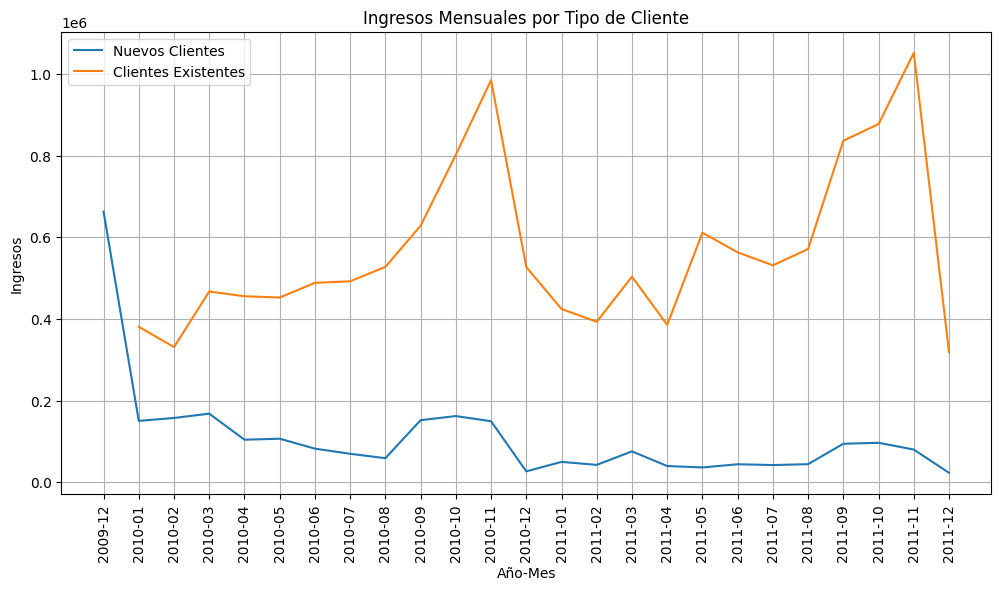

In [41]:
# Gráfico de líneas
plt.figure(figsize=(12,6))
plt.plot(pivot.index, pivot['New'], label='Nuevos Clientes')
plt.plot(pivot.index, pivot['Existente'], label='Clientes Existentes')
plt.xlabel('Año-Mes')
plt.ylabel('Ingresos')
plt.title('Ingresos Mensuales por Tipo de Cliente')
plt.xticks(rotation='vertical')
plt.legend()
plt.grid()
plt.show()

In [42]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceYearMonth,Revenue,Year,Month,Day,Quarter,DayOfWeek,Time,InvoiceYear,InvoiceMonth,FirstPurchaseYearMonth,UserType
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12,83.40,2009,12,1,4,1,07:45:00,2009,12,2009-12,New
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12,81.00,2009,12,1,4,1,07:45:00,2009,12,2009-12,New
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12,81.00,2009,12,1,4,1,07:45:00,2009,12,2009-12,New
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009-12,100.80,2009,12,1,4,1,07:45:00,2009,12,2009-12,New
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009-12,30.00,2009,12,1,4,1,07:45:00,2009,12,2009-12,New
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809555,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12,2011-12-09 12:16:00,1.25,12713.0,Germany,2011-12,15.00,2011,12,9,4,4,12:16:00,2011,12,2011-12,New
809556,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,2011-12-09 12:16:00,0.85,12713.0,Germany,2011-12,10.20,2011,12,9,4,4,12:16:00,2011,12,2011-12,New
809557,581578,22908,PACK OF 20 NAPKINS RED APPLES,12,2011-12-09 12:16:00,0.85,12713.0,Germany,2011-12,10.20,2011,12,9,4,4,12:16:00,2011,12,2011-12,New
809558,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12,2011-12-09 12:16:00,2.08,12713.0,Germany,2011-12,24.96,2011,12,9,4,4,12:16:00,2011,12,2011-12,New


In [43]:
# Número de clientes únicos para cada mes y tipo de usuario
customer_counts = df.groupby(['InvoiceYearMonth', 'UserType'])['Customer ID'].nunique()

In [44]:
# Reseteo del índice para convertir los índices en columnas
customer_counts = customer_counts.reset_index()

In [45]:
# Creación de pivot table para tener los tipos de usuarios como columnas
customer_counts = customer_counts.pivot(index='InvoiceYearMonth', columns='UserType', values='Customer ID')

In [46]:
# Cálculo del ratio de nuevos clientes a clientes existentes
customer_counts['NewCustomerRatio'] = customer_counts['New'] / customer_counts['Existente']

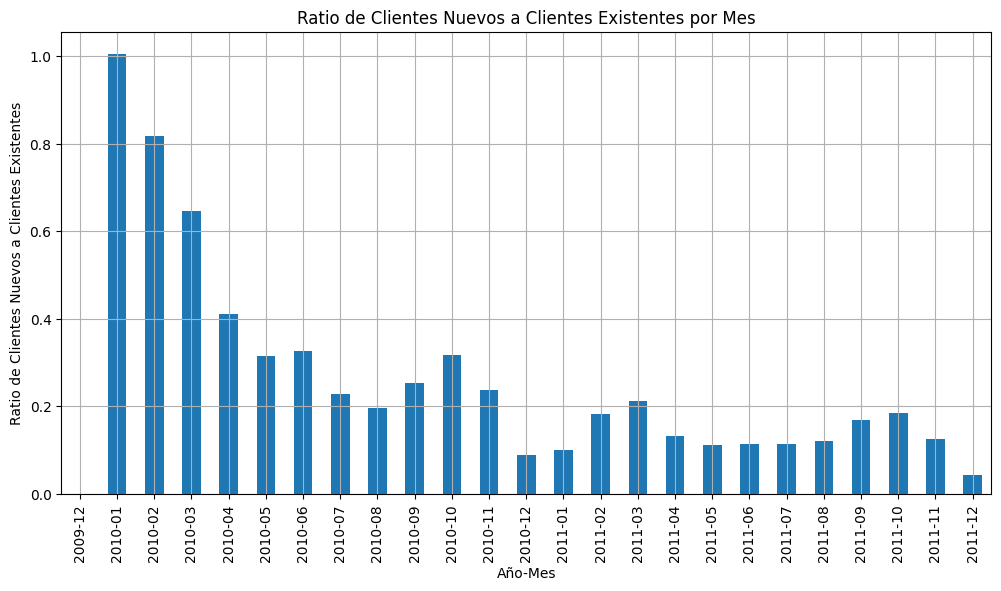

In [47]:
# Ratio de nuevos clientes a existentes
plt.figure(figsize=(12,6))
customer_counts['NewCustomerRatio'].plot(kind='bar', figsize=(12, 6))
plt.title('Ratio de Clientes Nuevos a Clientes Existentes por Mes')
plt.xlabel('Año-Mes')
plt.ylabel('Ratio de Clientes Nuevos a Clientes Existentes')
plt.grid()
plt.show()

In [48]:
customer_counts

UserType,Existente,New,NewCustomerRatio
InvoiceYearMonth,,,
2009-12,NaN,1045.0,NaN
2010-01,392.0,394.0,1.005102
2010-02,444.0,363.0,0.817568
2010-03,675.0,436.0,0.645926
2010-04,707.0,291.0,0.411598
2010-05,808.0,254.0,0.314356
2010-06,826.0,269.0,0.325666
2010-07,805.0,183.0,0.227329
2010-08,806.0,158.0,0.196030


# Modelo predicción CLTV

In [49]:
# Creación de la fecha límite para los últimos 12 meses
date_12m = pd.to_datetime("2010-06-01")
date_6m = pd.to_datetime("2011-06-01")
end_date = pd.to_datetime("2011-12-01")

In [50]:
# Entradas para los últimos 12 meses y los próximos 6 meses
dataset_12m = data[(data['InvoiceDate'] >= date_12m) & (data['InvoiceDate'] < date_6m)]
dataset_6m = data[(data['InvoiceDate'] >= date_6m) & (data['InvoiceDate'] < end_date)]

In [51]:
!pip install lifetimes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [52]:
from lifetimes.utils import summary_data_from_transaction_data

In [53]:
# Columna 'Revenue'
dataset_12m['Revenue'] = dataset_12m['Quantity'] * dataset_12m['Price']

In [54]:
# Preparación de los datos para el análisis RFM
rfm_data = summary_data_from_transaction_data(dataset_12m, 'Customer ID', 'InvoiceDate','Revenue')

In [55]:
rfm_data = rfm_data.reset_index()

In [56]:
rfm_data.head()

,Customer ID,frequency,recency,T,monetary_value
0,12346.0,3.0,204.0,337.0,-111.346667
1,12347.0,3.0,158.0,212.0,607.810000
2,12348.0,3.0,190.0,246.0,495.746667
3,12349.0,0.0,0.0,215.0,0.000000
4,12350.0,0.0,0.0,118.0,0.000000


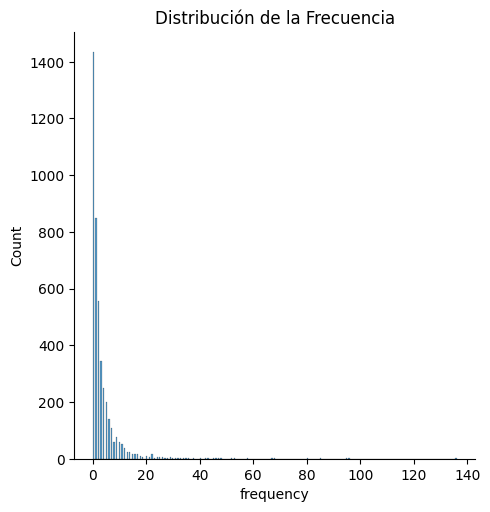

In [57]:
# Distribución de la frecuencia
sns.displot(rfm_data['frequency'])
plt.title('Distribución de la Frecuencia')
plt.show()

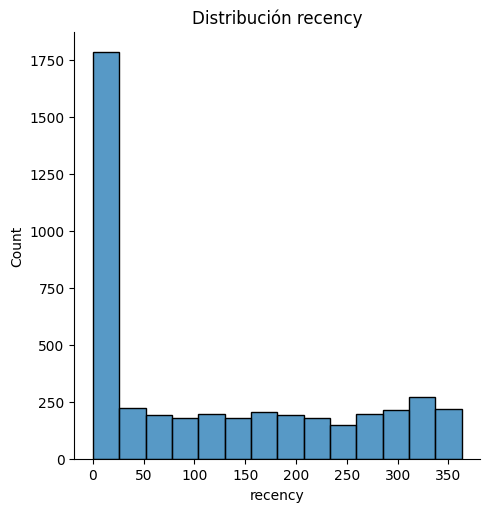

In [58]:
# Distribución recency
sns.displot(rfm_data['recency'])
plt.title('Distribución recency')
plt.show()

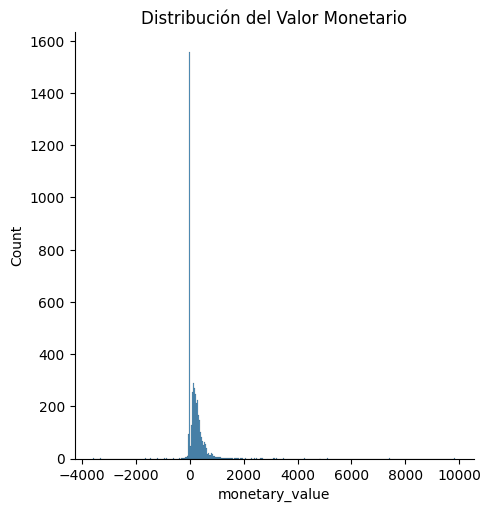

In [59]:
# Distribución del valor monetario
sns.displot(rfm_data['monetary_value'])
plt.title('Distribución del Valor Monetario')
plt.show()

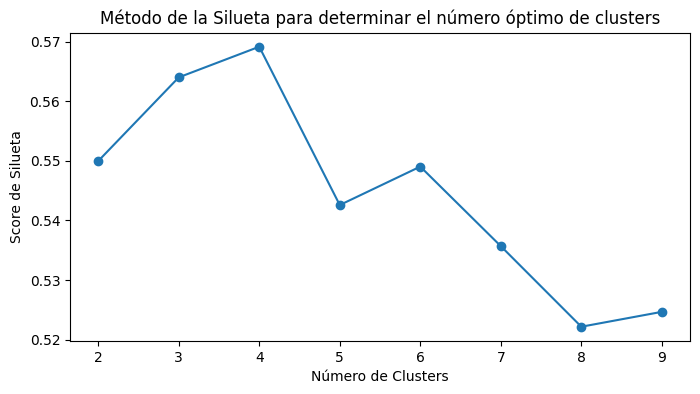

In [60]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Rango de los posibles clusters que se van a crear
cluster_range = range(2, 10)

# Inicializa una lista para los scores de silhoutte
silhouette_scores = []

# Escalado de datos
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_data[['recency', 'frequency', 'monetary_value']])

# Score de silhoutte para cada número de clusters
for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(rfm_scaled)
    silhouette_avg = silhouette_score(rfm_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# Scores de silhouette
plt.figure(figsize=(8,4))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Score de Silueta')
plt.title('Método de la Silueta para determinar el número óptimo de clusters')
plt.show()

In [61]:
# Número óptimo de clusters del gráfico anterior
optimal_clusters = 4

# KMeans con el número óptimo de clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)

# Clusters
rfm_data['FrequencyCluster'] = kmeans.fit_predict(rfm_data[['frequency']])
rfm_data['RecencyCluster'] = kmeans.fit_predict(rfm_data[['recency']])
rfm_data['MonetaryValueCluster'] = kmeans.fit_predict(rfm_data[['monetary_value']])

In [62]:
# Invertimos valores ya que un recency más bajo se considera mejor
rfm_data['RecencyCluster'] = 3 - rfm_data['RecencyCluster']

In [63]:
rfm_data['TotalScore'] = rfm_data['RecencyCluster'] + rfm_data['FrequencyCluster'] + rfm_data['MonetaryValueCluster']

In [64]:
# Función para segmentar a los clientes basándose en su puntuación total
def segment_customers(total_score):
    if total_score <= 2:  # o elige un umbral adecuado
        return 'Low'
    elif total_score <= 4:  # o elige un umbral adecuado
        return 'Medium'
    else:
        return 'High'

# Función a la puntuación total para obtener el segmento de cada cliente
rfm_data['Segment'] = rfm_data['TotalScore'].apply(segment_customers)

In [65]:
rfm_data

,Customer ID,frequency,recency,T,monetary_value,FrequencyCluster,RecencyCluster,MonetaryValueCluster,TotalScore,Segment
0,12346.0,3.0,204.0,337.0,-111.346667,0,1,0,1,Low
1,12347.0,3.0,158.0,212.0,607.810000,0,1,2,3,Medium
2,12348.0,3.0,190.0,246.0,495.746667,0,1,2,3,Medium
3,12349.0,0.0,0.0,215.0,0.000000,0,3,0,3,Medium
4,12350.0,0.0,0.0,118.0,0.000000,0,3,0,3,Medium
...,...,...,...,...,...,...,...,...,...,...
4371,18280.0,2.0,117.0,202.0,82.450000,0,0,0,0,Low
4372,18283.0,6.0,277.0,285.0,121.733333,2,2,0,4,Medium
4373,18284.0,1.0,2.0,239.0,-25.000000,0,3,0,3,Medium
4374,18286.0,1.0,57.0,341.0,833.480000,0,0,2,2,Low


In [66]:
rfm_data[["Segment","FrequencyCluster"]].value_counts()

Segment  FrequencyCluster
Medium   0                   2305
Low      0                    986
High     2                    478
Medium   2                    320
High     0                    141
         1                     67
Low      2                     34
Medium   1                     34
High     3                      9
Low      1                      2
dtype: int64

In [67]:
rfm_data[["Segment","RecencyCluster"]].value_counts()

Segment  RecencyCluster
Medium   3                 1875
Low      0                  670
High     2                  422
Medium   2                  382
         1                  371
Low      1                  254
High     3                  145
         1                  128
Low      2                   98
Medium   0                   31
dtype: int64

In [68]:
rfm_data[["Segment","MonetaryValueCluster"]].value_counts()

Segment  MonetaryValueCluster
Medium   0                       2171
Low      0                        697
High     2                        672
Medium   2                        446
Low      2                        295
Medium   1                         42
Low      1                         30
High     1                         15
         3                          5
         0                          3
dtype: int64

In [69]:
# Ingresos agregados para cada cliente en los próximos 6 meses
next_6m_data = dataset_6m.groupby('Customer ID')['Revenue'].sum().reset_index()

In [70]:
# Agrega puntuación al dataframe del modelo a nivel de cliente
rfm_data  = pd.merge(rfm_data, next_6m_data, on='Customer ID', how='left')

In [71]:
# Rellenar los NA's como 0
rfm_data = rfm_data.fillna(0)

In [72]:
rfm_data

,Customer ID,frequency,recency,T,monetary_value,FrequencyCluster,RecencyCluster,MonetaryValueCluster,TotalScore,Segment,Revenue
0,12346.0,3.0,204.0,337.0,-111.346667,0,1,0,1,Low,0.00
1,12347.0,3.0,158.0,212.0,607.810000,0,1,2,3,Medium,2261.75
2,12348.0,3.0,190.0,246.0,495.746667,0,1,2,3,Medium,310.00
3,12349.0,0.0,0.0,215.0,0.000000,0,3,0,3,Medium,1757.55
4,12350.0,0.0,0.0,118.0,0.000000,0,3,0,3,Medium,0.00
...,...,...,...,...,...,...,...,...,...,...,...
4371,18280.0,2.0,117.0,202.0,82.450000,0,0,0,0,Low,0.00
4372,18283.0,6.0,277.0,285.0,121.733333,2,2,0,4,Medium,1351.83
4373,18284.0,1.0,2.0,239.0,-25.000000,0,3,0,3,Medium,0.00
4374,18286.0,1.0,57.0,341.0,833.480000,0,0,2,2,Low,0.00


In [73]:
# Definición del rango intercuartil
Q1 = rfm_data['Revenue'].quantile(0.25)
Q3 = rfm_data['Revenue'].quantile(0.75)
IQR = Q3 - Q1

# Definición de los límites de los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [74]:
# Eliminar outliers
rfm_data = rfm_data[(rfm_data['Revenue'] >= lower_bound) & (rfm_data['Revenue'] <= upper_bound)]

In [75]:
rfm_data

,Customer ID,frequency,recency,T,monetary_value,FrequencyCluster,RecencyCluster,MonetaryValueCluster,TotalScore,Segment,Revenue
0,12346.0,3.0,204.0,337.0,-111.346667,0,1,0,1,Low,0.00
2,12348.0,3.0,190.0,246.0,495.746667,0,1,2,3,Medium,310.00
3,12349.0,0.0,0.0,215.0,0.000000,0,3,0,3,Medium,1757.55
4,12350.0,0.0,0.0,118.0,0.000000,0,3,0,3,Medium,0.00
5,12351.0,0.0,0.0,183.0,0.000000,0,3,0,3,Medium,0.00
...,...,...,...,...,...,...,...,...,...,...,...
4371,18280.0,2.0,117.0,202.0,82.450000,0,0,0,0,Low,0.00
4372,18283.0,6.0,277.0,285.0,121.733333,2,2,0,4,Medium,1351.83
4373,18284.0,1.0,2.0,239.0,-25.000000,0,3,0,3,Medium,0.00
4374,18286.0,1.0,57.0,341.0,833.480000,0,0,2,2,Low,0.00


In [76]:
# Límites para los clusters
ltv_lower = rfm_data['Revenue'].quantile(0.33)
ltv_middle = rfm_data['Revenue'].quantile(0.66)

# Variable categórica LTVCluster
rfm_data['LTVCluster'] = 0
rfm_data.loc[rfm_data['Revenue'] > ltv_lower, 'LTVCluster'] = 1
rfm_data.loc[rfm_data['Revenue'] > ltv_middle, 'LTVCluster'] = 2

In [77]:
rfm_data

,Customer ID,frequency,recency,T,monetary_value,FrequencyCluster,RecencyCluster,MonetaryValueCluster,TotalScore,Segment,Revenue,LTVCluster
0,12346.0,3.0,204.0,337.0,-111.346667,0,1,0,1,Low,0.00,0
2,12348.0,3.0,190.0,246.0,495.746667,0,1,2,3,Medium,310.00,1
3,12349.0,0.0,0.0,215.0,0.000000,0,3,0,3,Medium,1757.55,2
4,12350.0,0.0,0.0,118.0,0.000000,0,3,0,3,Medium,0.00,0
5,12351.0,0.0,0.0,183.0,0.000000,0,3,0,3,Medium,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4371,18280.0,2.0,117.0,202.0,82.450000,0,0,0,0,Low,0.00,0
4372,18283.0,6.0,277.0,285.0,121.733333,2,2,0,4,Medium,1351.83,2
4373,18284.0,1.0,2.0,239.0,-25.000000,0,3,0,3,Medium,0.00,0
4374,18286.0,1.0,57.0,341.0,833.480000,0,0,2,2,Low,0.00,0


In [78]:
# Convertir variables categóricas en numéricas
rfm_data = pd.get_dummies(rfm_data)

In [79]:
# Matriz de correlación
corr_matrix = rfm_data.corr()

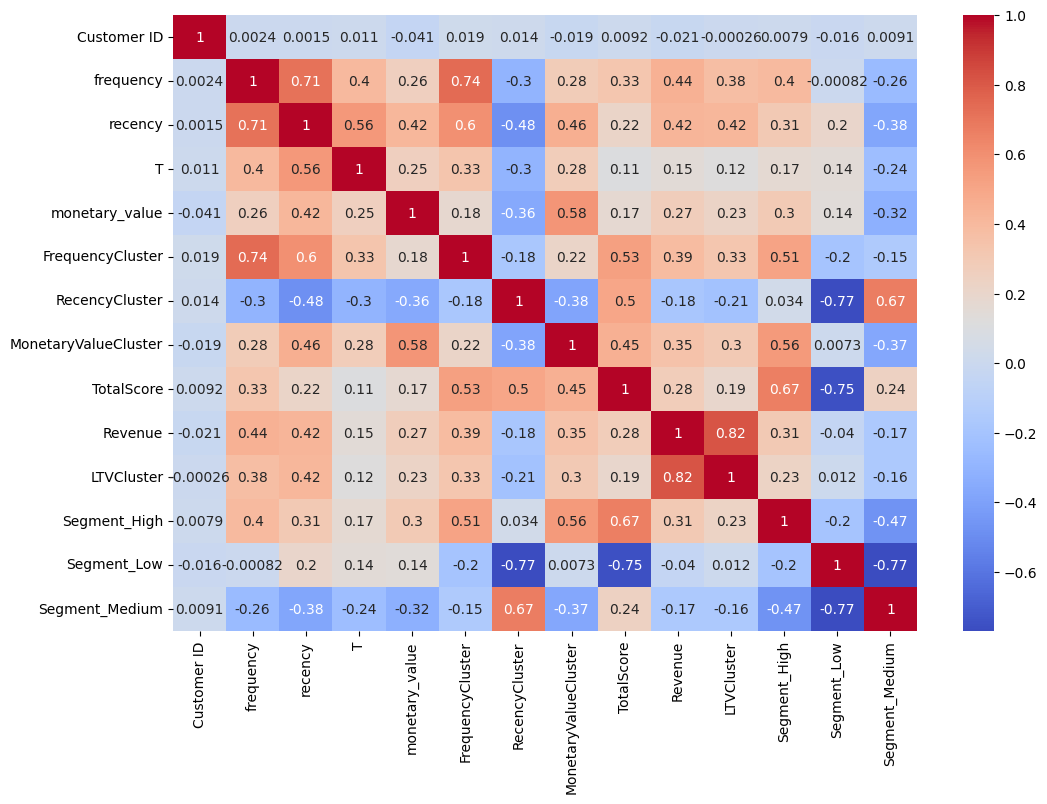

In [80]:
# Mapa de calor con la matriz de correlación
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.show()

In [81]:
# Variables explicativas y la variable objetivo
X = rfm_data.drop(['LTVCluster', 'Revenue'], axis=1)
y = rfm_data['LTVCluster']

In [82]:
# Lista de variables a graficar
selected_variables = ['frequency', 'recency', 'monetary_value']

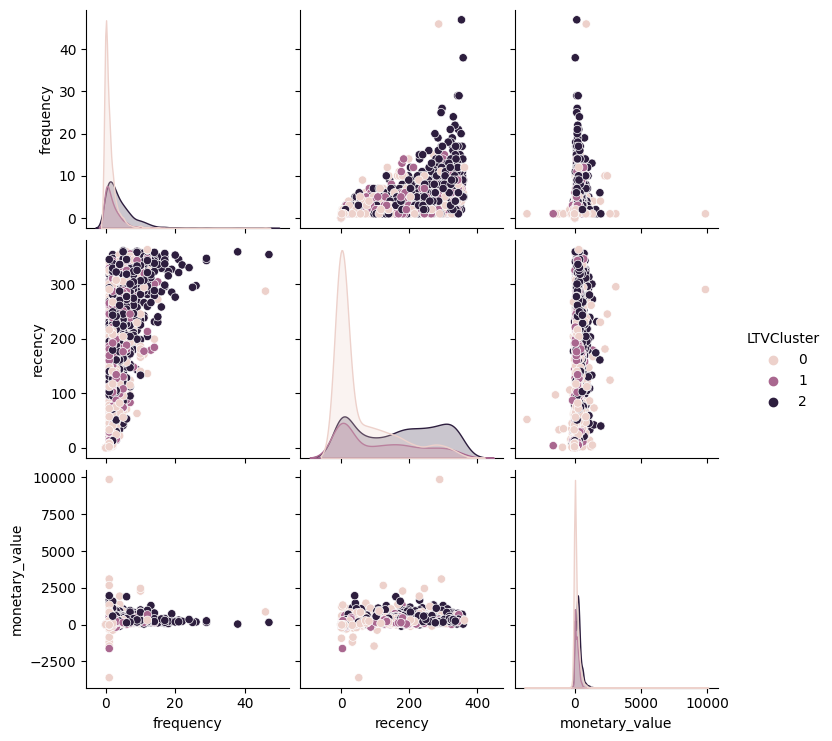

In [83]:
# Pairplot
sns.pairplot(rfm_data[selected_variables + ['LTVCluster']], hue='LTVCluster')

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

In [85]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.05, random_state=56)

In [86]:
param_grid = {
    'max_depth': [5, 6, 7],
    'subsample': [0.4, 0.5, 0.6],
    'learning_rate': [0.05, 0.1, 0.15],
    'objective': ['multi:softprob'],
    'num_class': [3],
    'n_estimators': [1000, 1500, 2000]
}

In [87]:
model = XGBClassifier(random_state=56)

In [88]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

iv.	Se llama al método .fit() incluyendo [(X_train, y_train)]

In [89]:
grid_search.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=50)

Se han truncado las últimas 5000 líneas del flujo de salida.
[17]	validation_0-mlogloss:0.88982
[18]	validation_0-mlogloss:0.88863
[19]	validation_0-mlogloss:0.88862
[20]	validation_0-mlogloss:0.88874
[21]	validation_0-mlogloss:0.88811
[22]	validation_0-mlogloss:0.88832
[23]	validation_0-mlogloss:0.88430
[24]	validation_0-mlogloss:0.88143
[25]	validation_0-mlogloss:0.88350
[26]	validation_0-mlogloss:0.88494
[27]	validation_0-mlogloss:0.88656
[28]	validation_0-mlogloss:0.88392
[29]	validation_0-mlogloss:0.88518
[30]	validation_0-mlogloss:0.88851
[31]	validation_0-mlogloss:0.89068
[32]	validation_0-mlogloss:0.88907
[33]	validation_0-mlogloss:0.88698
[34]	validation_0-mlogloss:0.89250
[35]	validation_0-mlogloss:0.89271
[36]	validation_0-mlogloss:0.89074
[37]	validation_0-mlogloss:0.89539
[38]	validation_0-mlogloss:0.89763
[39]	validation_0-mlogloss:0.89778
[40]	validation_0-mlogloss:0.89842
[41]	validation_0-mlogloss:0.90042
[42]	validation_0-mlogloss:0.90208
[43]	validation_0-mlogloss:0.

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=56, ...),
             param_grid={'learning_rate': [0.05, 0.1, 0.15],
                         'max_depth': [5, 6, 7],
                         'n_estimators': [1000, 1500, 2000], 'num_class': [3],
                         'objective': ['multi:softprob'],
                         'subsample': [0.4, 0.5, 0.6]})

In [90]:
results_df = pd.DataFrame(grid_search.cv_results_)

In [91]:
# Mejor combinación de hiperparámetros
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Mejores parámetros: {best_params}")
print(f"Mejor puntuación: {best_score}")

Mejores parámetros: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 1000, 'num_class': 3, 'objective': 'multi:softprob', 'subsample': 0.6}
Mejor puntuación: 0.6191744340878828


In [92]:
# Fila/s con el mejor puntaje
best_row = results_df[results_df['rank_test_score'] == 1]

In [93]:
best_row

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,param_num_class,param_objective,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
29,2.192138,0.363970,0.009013,0.003878,0.1,5,1000,3,multi:softprob,0.6,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.608522,0.633822,0.63249,0.619174,0.601864,0.619174,0.012688,1
32,2.118527,0.414406,0.009032,0.002363,0.1,5,1500,3,multi:softprob,0.6,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.608522,0.633822,0.63249,0.619174,0.601864,0.619174,0.012688,1
35,2.256907,0.705288,0.008415,0.003640,0.1,5,2000,3,multi:softprob,0.6,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.608522,0.633822,0.63249,0.619174,0.601864,0.619174,0.012688,1


In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [95]:
rf_param_grid = {
    'n_estimators': [200, 300, 400],
    'max_depth': [4, 6, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [96]:
# Inicializar RandomForestClassifier
rf = RandomForestClassifier(random_state=56)

In [97]:
# Inicializar GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=5)

In [98]:
# Ajuste GridSearchCV al conjunto de datos de entrenamiento
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=56),
             param_grid={'max_depth': [4, 6, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 300, 400]})

In [99]:
rf_results_df = pd.DataFrame(grid_search_rf.cv_results_)

In [100]:
# Fila/s con el mejor puntaje
rf_best_row = rf_results_df[rf_results_df['rank_test_score'] == 1]

In [101]:
# Mejores parámetros y la mejor puntuación
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_
print(f"Mejores parámetros: {best_params_rf}")
print(f"Mejor puntuación: {best_score_rf}")

Mejores parámetros: {'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Mejor puntuación: 0.6199733688415445


In [102]:
rf_best_row

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
91,1.059594,0.019052,0.059948,0.002163,6,auto,2,2,300,"{'max_depth': 6, 'max_features': 'auto', 'min_...",0.603196,0.631158,0.633822,0.617843,0.613848,0.619973,0.011317,1
118,1.207240,0.224283,0.068622,0.015797,6,sqrt,2,2,300,"{'max_depth': 6, 'max_features': 'sqrt', 'min_...",0.603196,0.631158,0.633822,0.617843,0.613848,0.619973,0.011317,1
145,1.196671,0.219334,0.067805,0.012451,6,log2,2,2,300,"{'max_depth': 6, 'max_features': 'log2', 'min_...",0.603196,0.631158,0.633822,0.617843,0.613848,0.619973,0.011317,1


In [103]:
from lightgbm import LGBMClassifier

In [104]:
lg_param_grid = {
    'n_estimators': [200, 300, 400],
    'learning_rate': [0.01, 0.1],
    'max_depth': [4, 6, 8],
    'num_leaves': [20, 30, 40],
    'subsample': [0.5, 0.6, 0.7],
    'colsample_bytree': [0.6, 0.7, 0.8]
}

In [105]:
# Inicializar LGBMClassifier
lgbm = LGBMClassifier(random_state=56)

In [106]:
# Inicializar GridSearchCV
grid_search_lgbm = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=5)

In [107]:
# Ajuste GridSearchCV al conjunto de datos de entrenamiento
grid_search_lgbm.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LGBMClassifier(random_state=56),
             param_grid={'learning_rate': [0.05, 0.1, 0.15],
                         'max_depth': [5, 6, 7],
                         'n_estimators': [1000, 1500, 2000], 'num_class': [3],
                         'objective': ['multi:softprob'],
                         'subsample': [0.4, 0.5, 0.6]})

In [108]:
lg_results_df = pd.DataFrame(grid_search_lgbm.cv_results_)

In [109]:
# Fila/s con el mejor puntaje
lg_best_row = lg_results_df[lg_results_df['rank_test_score'] == 1]

In [110]:
# Mejores parámetros y la mejor puntuación
best_params_lgbm = grid_search_lgbm.best_params_
best_score_lgbm = grid_search_lgbm.best_score_
print(f"Mejores parámetros: {best_params_lgbm}")
print(f"Mejor puntuación: {best_score_lgbm}")

Mejores parámetros: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 1000, 'num_class': 3, 'objective': 'multi:softprob', 'subsample': 0.4}
Mejor puntuación: 0.5717709720372837


In [111]:
lg_best_row

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,param_num_class,param_objective,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.962910,0.671892,0.140541,0.015314,0.05,5,1000,3,multi:softprob,0.4,"{'learning_rate': 0.05, 'max_depth': 5, 'n_est...",0.583222,0.552597,0.581891,0.577896,0.563249,0.571771,0.011928,1
1,1.959803,0.776126,0.143144,0.026529,0.05,5,1000,3,multi:softprob,0.5,"{'learning_rate': 0.05, 'max_depth': 5, 'n_est...",0.583222,0.552597,0.581891,0.577896,0.563249,0.571771,0.011928,1
2,1.981069,0.793437,0.140349,0.021478,0.05,5,1000,3,multi:softprob,0.6,"{'learning_rate': 0.05, 'max_depth': 5, 'n_est...",0.583222,0.552597,0.581891,0.577896,0.563249,0.571771,0.011928,1


In [112]:
import xgboost as xgb

In [113]:
# XGBClassifier
best_model = grid_search.best_estimator_

In [114]:
# Convertimos nuestro modelo en un Booster para usar las funciones de ploteo
booster = best_model.get_booster()

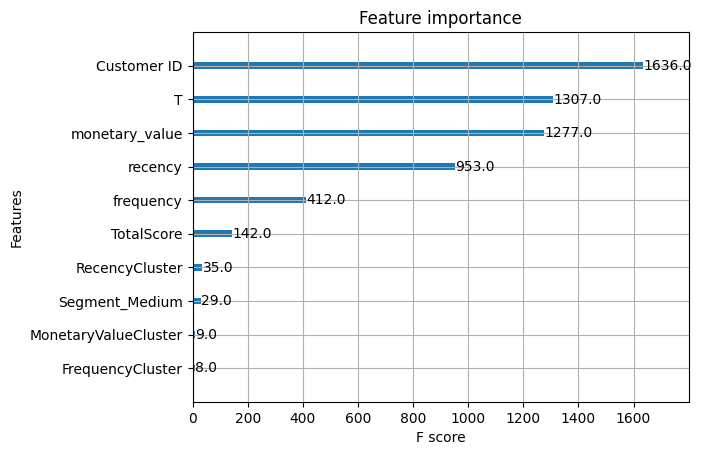

In [115]:
# Ploteamos la importancia de las características
xgb.plot_importance(booster)
plt.show()

In [116]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


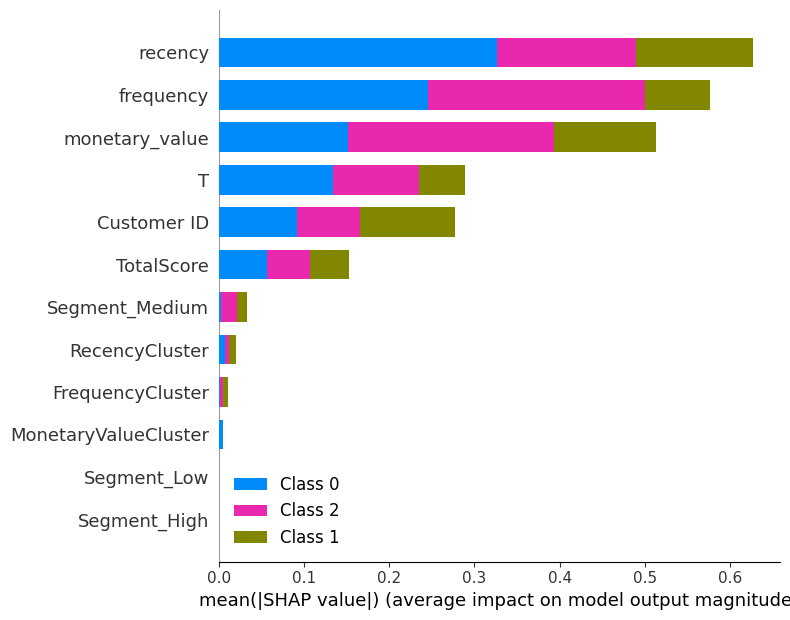

In [117]:
import shap

# Selección de una muestra de los datos
sample = X_val.sample(n=10, random_state=56)

# Inición del explainer de SHAP con feature_perturbation establecido en 'interventional'
explainer = shap.TreeExplainer(best_model, feature_perturbation='interventional')

# Valores SHAP para nuestra muestra
shap_values = explainer.shap_values(sample, check_additivity=False)

# Visualización de los valores SHAP
shap.summary_plot(shap_values, sample)

In [118]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

In [119]:
# Predicciones en los conjuntos de entrenamiento y validación
train_preds = grid_search.predict(X_train)
val_preds = grid_search.predict(X_val)

In [120]:
# Métricas de evaluación para el conjunto de entrenamiento
train_accuracy = accuracy_score(y_train, train_preds)
train_precision = precision_score(y_train, train_preds, average='weighted') # Para multiclases
train_recall = recall_score(y_train, train_preds, average='weighted') # Para multiclases
train_f1 = f1_score(y_train, train_preds, average='weighted') # Para multiclases

In [121]:
# Métricas de evaluación para el conjunto de validación
val_accuracy = accuracy_score(y_val, val_preds)
val_precision = precision_score(y_val, val_preds, average='weighted') # Para multiclases
val_recall = recall_score(y_val, val_preds, average='weighted') # Para multiclases
val_f1 = f1_score(y_val, val_preds, average='weighted') # Para multiclases

In [122]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)


In [123]:
# AUC-ROC para conjuntos de entrenamiento y validación
train_auc_roc = multiclass_roc_auc_score(y_train, train_preds)
val_auc_roc = multiclass_roc_auc_score(y_val, val_preds)

In [124]:
# Métricas de evaluación
print("Accuracy de entrenamiento: ", train_accuracy)
print("Precision de entrenamiento: ", train_precision)
print("recall de entrenamiento: ", train_recall)
print("F1 de entrenamiento: ", train_f1)
print("AUC-ROC de entrenamiento: ", train_auc_roc)

Accuracy de entrenamiento:  0.6790945406125166
Precision de entrenamiento:  0.7014676687767468
recall de entrenamiento:  0.6790945406125166
F1 de entrenamiento:  0.6313681503919208
AUC-ROC de entrenamiento:  0.6815658159537054


In [125]:
print("Accuracy de validación: ", val_accuracy)
print("Precision de validación: ", val_precision)
print("recall de validación: ", val_recall)
print("F1 de validación: ", val_f1)
print("AUC-ROC de validación: ", val_auc_roc)

Accuracy de validación:  0.5959595959595959
Precision de validación:  0.49512723852850815
recall de validación:  0.5959595959595959
F1 de validación:  0.5407737357750546
AUC-ROC de validación:  0.6175292102753395


In [126]:
from sklearn.metrics import confusion_matrix

In [127]:
# Etiquetas para los conjuntos de datos de entrenamiento y validación
train_preds = best_model.predict(X_train)
val_preds = best_model.predict(X_val)

In [128]:
# Matrices de confusión para los conjuntos de datos de entrenamiento y validación
train_confusion = confusion_matrix(y_train, train_preds)
val_confusion = confusion_matrix(y_val, val_preds)

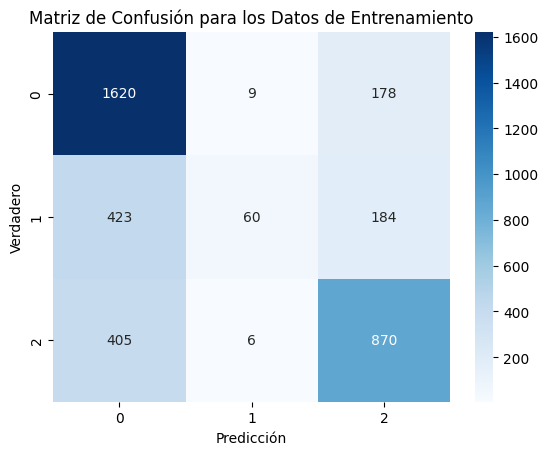

In [129]:
# Matriz de confusión para los datos de entrenamiento
sns.heatmap(train_confusion, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión para los Datos de Entrenamiento')
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.show()

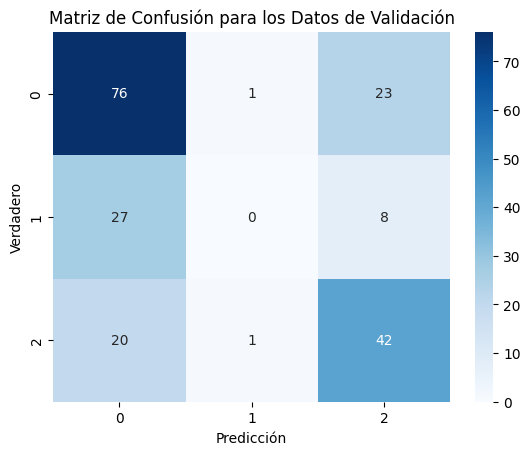

In [130]:
# Matriz de confusión para los datos de validación
sns.heatmap(val_confusion, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión para los Datos de Validación')
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.show()

A partir de los resultados proporcionados, el modelo XGBoost parece tener un rendimiento decente en el conjunto de entrenamiento, con una precisión del 66%. Sin embargo, la precisión disminuye ligeramente a un 59% en el conjunto de validación. Este descenso en el rendimiento en el conjunto de validación en comparación con el conjunto de entrenamiento puede ser un indicio de overfitting, ya que el modelo puede estar ajustándose demasiado a los datos de entrenamiento y, por lo tanto, no generaliza tan bien a los datos no vistos.

La diferencia entre las métricas de evaluación (precisión, recall, F1 y AUC-ROC) para los conjuntos de entrenamiento y validación no es significativa, lo que sugiere que el modelo es capaz de generalizar a los datos de validación. Esto también indica que el modelo no sufre de un overfitting severo.

Además, a partir de la matriz de confusión, podemos ver que el modelo ha clasificado correctamente la mayoría de las instancias de la clase 0 y 2 tanto en el conjunto de entrenamiento como de validación, pero tiene problemas con la clase 1.

En conclusión, aunque el modelo XGBoost muestra un rendimiento razonablemente bueno, hay espacio para mejorar, especialmente en lo que respecta a la clasificación de la clase 1. Además, aunque el modelo parece generalizar bastante bien a los datos de validación, se debe prestar atención a los posibles problemas de overfitting en el futuro. Esto puede hacerse utilizando técnicas de regularización, ajustando los hiperparámetros o utilizando técnicas de validación cruzada para obtener una mejor evaluación del rendimiento del modelo en datos no vistos.
